In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from math import sqrt

from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score
import keras_tuner as kt

from collections import Counter 
import pickle
import pandas as pd
import collections
import seaborn as sns

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
data = pd.read_csv('Tg.csv')

In [4]:
df = data.dropna()
df = df.reset_index(drop=True)

In [5]:
df

,Smiles,Tg
0,*C*,-63.48
1,*C(C*)C,-2.73
2,*C(C*)CC,-22.54
3,*C(C*)CCC,-32.29
4,*C(C*)C(C)C,10.97
...,...,...
6902,*C1C(CC(C1)CC(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,98.00
6903,*C1C(CC(C1)C(O)(C(F)(F)F)C(F)(F)F)(C(C*)(F)F)F,118.00
6904,*c1cc2C3(CCC(CC3)(C3=NC(CO3)c3ccccc3)C3=NC(CO3...,161.00
6905,*c1cc2C3(CCC(CC3)(C3=NC(CO3)Cc3ccccc3)C3=NC(CO...,142.00


In [12]:
fn = df.Smiles.apply(Chem.MolFromSmiles).apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))
X = pd.DataFrame()
for i in range(1024):
    col_name = f'Bit_{i+1}'  # 列名
    X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col_name] = fn.apply(lambda x: int(bool(x.GetBit(i))))
C:\Users\tyue4\AppData\Local\Temp\ipykernel_37464\816915522.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [13]:
X

,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,Bit_10,...,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023,Bit_1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Concatenate
from numpy.random import seed
import tensorflow

In [15]:
col = 'Tg'
Y = df[[col]]
xtrain, xtest, ytrain, ytest=train_test_split(X.iloc[Y[col].dropna().index].values, Y[col].dropna(), test_size=0.1, random_state=11)

In [16]:
n_1=int(256)
n_2=int(64)
n_3=int(2048)
n_4=int(512)

In [ ]:
A1 = Input(shape=(1024),name='A1')
A2 = Dense(n_1, activation='relu',name='A2')(A1)
A3 = Dense(n_2, activation='relu',name='A3')(A2)
A4 = Dense(n_3, activation='relu',name='A4')(A3)
A5 = Dense(n_4, activation='relu',name='A5')(A4)
A6 = Dense(1, name='A6')(A5)

B2 = Dense(n_1, activation='relu',name='B2')(A1)
B3 = Dense(n_2, activation='relu',name='B3')(B2)
B4 = Dense(n_3, activation='relu',name='B4')(B3)
B5 = Dense(n_4, activation='relu',name='B5')(B4)
B6 = Dense(1, name='B6')(B5)

C2 = Dense(n_1, activation='relu',name='C2')(A1)
C3 = Dense(n_2, activation='relu',name='C3')(C2)
C4 = Dense(n_3, activation='relu',name='C4')(C3)
C5 = Dense(n_4, activation='relu',name='C5')(C4)
C6 = Dense(1, name='C6')(C5)

D2 = Dense(n_1, activation='relu',name='D2')(A1)
D3 = Dense(n_2, activation='relu',name='D3')(D2)
D4 = Dense(n_3, activation='relu',name='D4')(D3)
D5 = Dense(n_4, activation='relu',name='D5')(D4)
D6 = Dense(1, name='D6')(D5)

E2 = Dense(n_1, activation='relu',name='E2')(A1)
E3 = Dense(n_2, activation='relu',name='E3')(E2)
E4 = Dense(n_3, activation='relu',name='E4')(E3)
E5 = Dense(n_4, activation='relu',name='E5')(E4)
E6 = Dense(1, name='E6')(E5)

F2 = Dense(n_1, activation='relu',name='F2')(A1)
F3 = Dense(n_2, activation='relu',name='F3')(F2)
F4 = Dense(n_3, activation='relu',name='F4')(F3)
F5 = Dense(n_4, activation='relu',name='F5')(F4)
F6 = Dense(1, name='F6')(F5)

G2 = Dense(n_1, activation='relu',name='G2')(A1)
G3 = Dense(n_2, activation='relu',name='G3')(G2)
G4 = Dense(n_3, activation='relu',name='G4')(G3)
G5 = Dense(n_4, activation='relu',name='G5')(G4)
G6 = Dense(1, name='G6')(G5)

H2 = Dense(n_1, activation='relu',name='H2')(A1)
H3 = Dense(n_2, activation='relu',name='H3')(H2)
H4 = Dense(n_3, activation='relu',name='H4')(H3)
H5 = Dense(n_4, activation='relu',name='H5')(H4)
H6 = Dense(1, name='H6')(H5)

I2 = Dense(n_1, activation='relu',name='I2')(A1)
I3 = Dense(n_2, activation='relu',name='I3')(I2)
I4 = Dense(n_3, activation='relu',name='I4')(I3)
I5 = Dense(n_4, activation='relu',name='I5')(I4)
I6 = Dense(1, name='I6')(I5)

J2 = Dense(n_1, activation='relu',name='J2')(A1)
J3 = Dense(n_2, activation='relu',name='J3')(J2)
J4 = Dense(n_3, activation='relu',name='J4')(J3)
J5 = Dense(n_4, activation='relu',name='J5')(J4)
J6 = Dense(1, name='J6')(J5)

K2 = Dense(n_1, activation='relu',name='K2')(A1)
K3 = Dense(n_2, activation='relu',name='K3')(K2)
K4 = Dense(n_3, activation='relu',name='K4')(K3)
K5 = Dense(n_4, activation='relu',name='K5')(K4)
K6 = Dense(1, name='K6')(K5)

L2 = Dense(n_1, activation='relu',name='L2')(A1)
L3 = Dense(n_2, activation='relu',name='L3')(L2)
L4 = Dense(n_3, activation='relu',name='L4')(L3)
L5 = Dense(n_4, activation='relu',name='L5')(L4)
L6 = Dense(1, name='L6')(L5)


concat_layer = Concatenate()([A6, B6, C6, D6, E6, F6, G6, H6, I6, J6, K6, L6])
#concat_layer = Concatenate()([A6, B6, C6])
model = Model(inputs=[A1],outputs=concat_layer)
model.compile(loss = "mse", optimizer = 'adam')

seed(1)
tensorflow.random.set_seed(1*7+333)

history = model.fit(xtrain, [ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain, ytrain], epochs=100, batch_size=2, validation_data = ((xtest), [ytest, ytest, ytest, ytest, ytest, ytest, ytest, ytest, ytest, ytest, ytest, ytest]), verbose=2)

In [19]:
y_pred_train = model.predict((xtrain))
y_pred_train = y_pred_train.mean(axis=1)
print("Train set R^2: ", r2_score(ytrain, y_pred_train))

y_pred_test = model.predict((xtest))
y_pred_test = y_pred_test.mean(axis=1)
print("Test set R^2: ", r2_score(ytest, y_pred_test))

195/195 [==============================] - 1s 5ms/step
Train set R^2:  0.9975521721912276
22/22 [==============================] - 0s 5ms/step
Test set R^2:  0.9317048716614605


Text(219.15000000000003, 466.416, 'Test  $R^2 =0.93$')

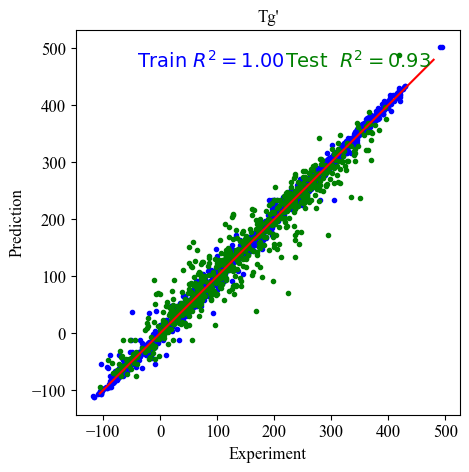

In [20]:
plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
plt.plot(ytrain, y_pred_train, 'b.') 
plt.plot(ytest, y_pred_test, 'g.') 

plt.xlabel("Experiment",fontname="Times New Roman", fontsize=12)
plt.ylabel("Prediction",fontname="Times New Roman", fontsize=12)
x0, x1 = min(ytrain), max(ytrain)
length = 750
x_start, x_end = x0*0.9, x1*1.1
#plt.xlim([-200, 550])
#plt.ylim([-200, 550])
#ax.set_xticks([-200,-100,0,100,200,300,400,500])
#ax.set_yticks([-200,-100,0,100,200,300,400,500])
plt.xticks(fontname="Times New Roman", fontsize=12, fontweight='normal')
plt.yticks(fontname="Times New Roman", fontsize=12, fontweight='normal')
plt.title("Tg\'",fontname="Times New Roman", fontsize=12, fontweight='normal')
plt.gca().set_aspect("equal", adjustable="box")
# the unit line
plt.plot(np.arange(x_start, x_end, (x_end - x_start) / 10),
np.arange(x_start, x_end, (x_end - x_start) / 10), 'r-')
plt.text(x_start + (x_end - x_start)*0.1, x_end - (x_end - x_start)*0.12, "Train $R^2={:.2f}$".format(r2_score(ytrain, y_pred_train)),{'color':"b"}, fontsize=14)
plt.text(x_start + (x_end - x_start)*0.5, x_end - (x_end - x_start)*0.12, "Test  $R^2 ={:.2f}$".format(r2_score(ytest, y_pred_test)),{'color':"g"}, fontsize=14)
#plt.savefig("Parity_{}.png".format(col), dpi=600, bbox_inches='tight')

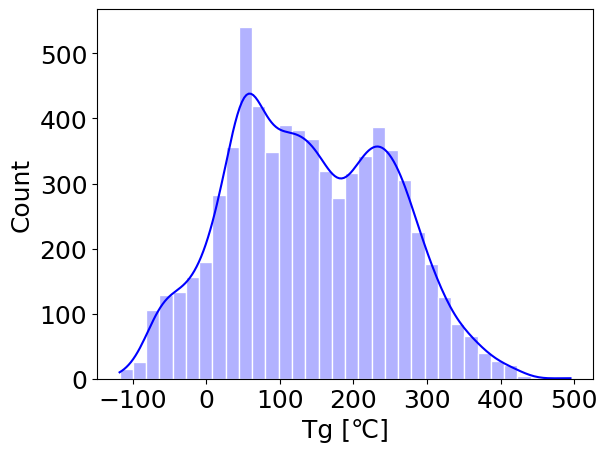

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot
kwargs = dict(hist_kws={'alpha':.3, 'edgecolor':'white'})
#plt.figure(figsize=(4,4), dpi= 600)
DF = data
sns.histplot(DF['Tg'].dropna(), kde=True, color = 'blue', alpha = 0.3, edgecolor='white')

#plt.xlim(-200,500)
#plt.legend()
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel("Tg [℃]",fontsize=18)
plt.ylabel("Count",fontsize=18) 

plt.savefig("Polyureas_Tg℃.png", bbox_inches='tight')

In [22]:
model.save(r"D:\Benchmark Inverse\Tg_NN\model_tg.h5")